In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.dates as md 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv('usedcarv1.csv')
data.head()

,model,Manufacture,transmission,fuelType,year,tax,mpg,engineSize,mileage,price
0,SLK,Mercedes,Automatic,Petrol,2005,325,32.1,1.8,63000,5200
1,S Class,Mercedes,Automatic,Hybrid,2017,20,61.4,2.1,27000,34948
2,SL CLASS,Mercedes,Automatic,Petrol,2016,555,28.0,5.5,6200,49948
3,G Class,Mercedes,Automatic,Petrol,2016,325,30.4,4.0,16000,61948
4,G Class,Mercedes,Automatic,Petrol,2016,325,30.1,4.0,4000,73948


### 5 numerical columns: Price, mileage, tax, mpg and Engine Size
### 4 categorical columns: Model, transmission , Manufacture and Fuel Type
### 1 date column: year 


In [3]:
data = pd.read_csv("usedcarv1.csv", header=0)
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52533 entries, 0 to 52532
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         52533 non-null  object 
 1   Manufacture   52533 non-null  object 
 2   transmission  52533 non-null  object 
 3   fuelType      52533 non-null  object 
 4   year          52533 non-null  int64  
 5   tax           52533 non-null  int64  
 6   mpg           52533 non-null  float64
 7   engineSize    52533 non-null  float64
 8   mileage       52533 non-null  int64  
 9   price         52533 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 4.0+ MB
None


## Missing values inside data

In [47]:
data.isna().sum()

model           0
Manufacture     0
transmission    0
fuelType        0
year            0
tax             0
mpg             0
engineSize      0
mileage         0
price           0
car_age         0
dtype: int64

In [5]:
#summary 
data.describe()

,year,tax,mpg,engineSize,mileage,price
count,52533.000000,52533.000000,52533.000000,52533.000000,52533.000000,52533.000000
mean,2017.064245,123.833210,55.461162,1.816576,23745.530200,19682.436449
std,2.179909,64.279225,18.308361,0.632283,22029.130268,11240.598940
min,1970.000000,0.000000,1.100000,0.000000,1.000000,495.000000
25%,2016.000000,125.000000,47.100000,1.400000,7200.000000,11950.000000
50%,2017.000000,145.000000,55.400000,2.000000,17695.000000,17338.000000
75%,2019.000000,145.000000,64.200000,2.000000,33446.000000,24500.000000
max,2020.000000,580.000000,470.800000,6.600000,323000.000000,159999.000000


### In the Year column our old year is 1970 and 25% year is 2016 that means we have old cars that are before 2016 and latest car Year is 2020. While looking into max mileage the number have high variability probably because of outliers. 

In [6]:
#Number of models car in our dataset
data.model.value_counts().shape

(100,)

### In our data set we have 100 Models of car

## Data Visualization

Manual       23859
Semi-Auto    16192
Automatic    12482
Name: transmission, dtype: int64

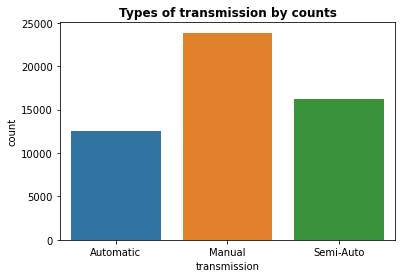

In [7]:
data.transmission.value_counts()
ax= sns.countplot(data['transmission'])
plt.title('Types of transmission by counts', weight='bold')
data.transmission.value_counts()

### Most of our car has Manual transission  by 23859


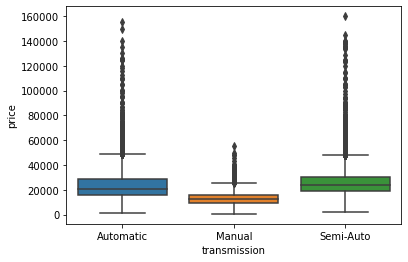

In [8]:
sns.boxplot(x='transmission',y= 'price', data=data)

### While comparing Price with Transmission we can analyse Semi- Auto transmission car is expensive 

Diesel      27568
Petrol      24431
Hybrid        488
Electric       46
Name: fuelType, dtype: int64

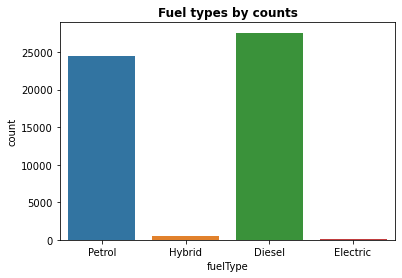

In [9]:
data.transmission.value_counts()
ax= sns.countplot(data['fuelType'])
plt.title('Fuel types by counts', weight='bold')
data.fuelType.value_counts()

### Most of our car  Diesel fuel type cars by 27568

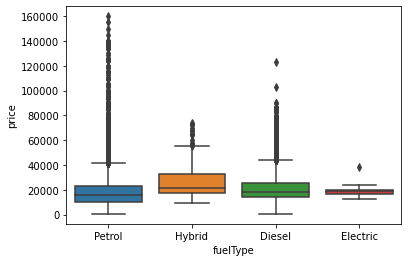

In [10]:
sns.boxplot(x='fuelType',y= 'price', data=data)

### while comparing fuel type with price we can understand that Hybrid cars are exensive compare to other fuel types. 

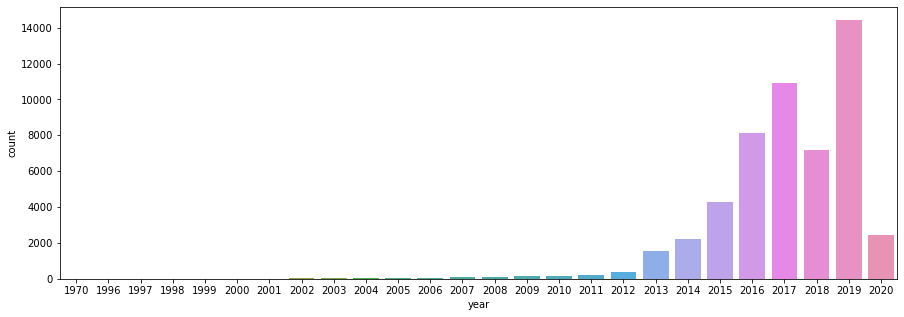

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(data['year'])

###  While looking into graph most of our cars are in the year of 2019

### To understand much better insight we are adding Car age into the dataset to understand the  impact on price.

In [12]:
data['car_age'] = 2020-data['year']
data.head()

,model,Manufacture,transmission,fuelType,year,tax,mpg,engineSize,mileage,price,car_age
0,SLK,Mercedes,Automatic,Petrol,2005,325,32.1,1.8,63000,5200,15
1,S Class,Mercedes,Automatic,Hybrid,2017,20,61.4,2.1,27000,34948,3
2,SL CLASS,Mercedes,Automatic,Petrol,2016,555,28.0,5.5,6200,49948,4
3,G Class,Mercedes,Automatic,Petrol,2016,325,30.4,4.0,16000,61948,4
4,G Class,Mercedes,Automatic,Petrol,2016,325,30.1,4.0,4000,73948,4


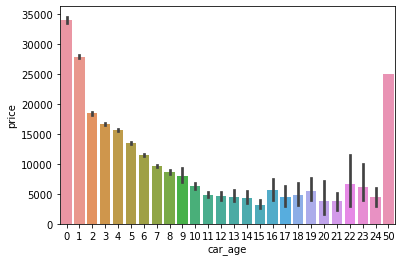

In [13]:
sns.barplot(x = 'car_age',y='price',data=data)

### As the age of car increases the price gets reduces we can see at the age of 50 one car that is very old probably vintage car 

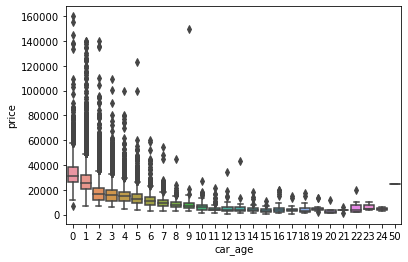

In [14]:
sns.boxplot(x = 'car_age',y='price',data=data)

Text(0.5, 1.0, 'Transmission VS Car age')

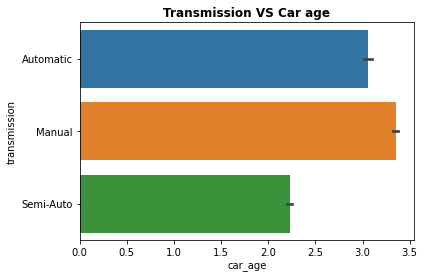

In [15]:
sns.barplot(x = 'car_age',y='transmission',data=data)
plt.title('Transmission VS Car age', weight='bold')

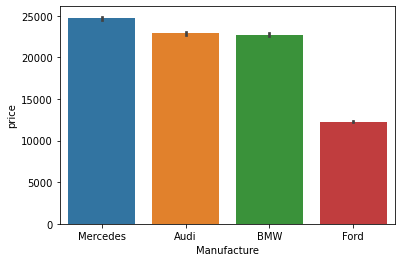

In [16]:
sns.barplot(x = 'Manufacture',y='price',data=data)

### we have 4 manufacture in our dataset when comparing with price Mercedes car is expensive 

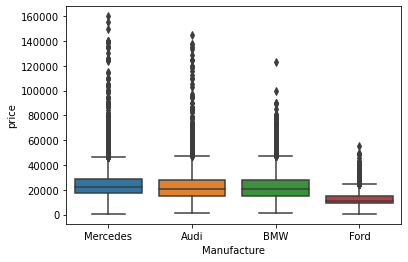

In [17]:
sns.boxplot(x = 'Manufacture',y='price',data=data)

Text(0.5, 1.0, 'Top 5 models')

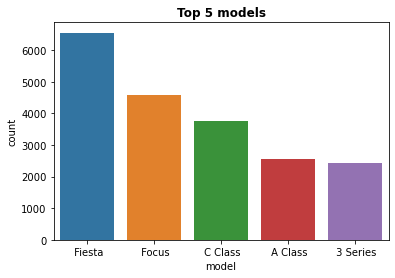

In [18]:
sns.countplot(x='model',data=data, order=data.model.value_counts().iloc[:5].index)
plt.title('Top 5 models', weight='bold')

### More than 6k used car are Ford Fiesta model followed by Ford Focus.

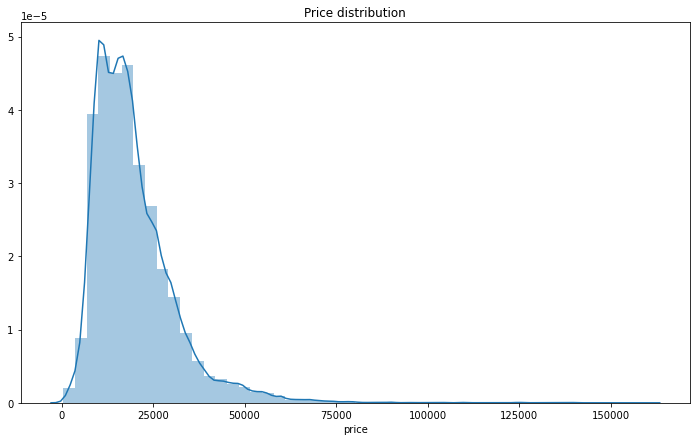

In [19]:
#Price distribution
plt.figure(figsize=(12,7))
plt.title('Price distribution')
sns.distplot(data['price'])

Text(0.5, 1.0, 'Price Vs Mileage')

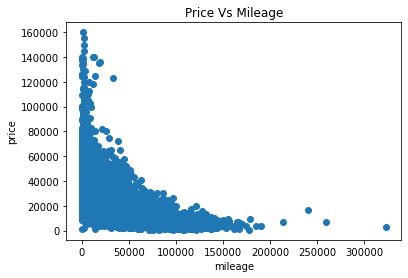

In [20]:
plt.scatter(data['mileage'],data['price'])
plt.xlabel('mileage')
plt.ylabel('price')
plt.title('Price Vs Mileage')

Text(0.5, 1.0, 'Price Vs EngineSize')

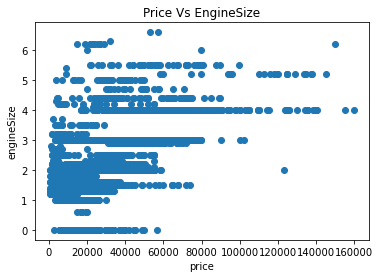

In [21]:
plt.scatter(data['price'],data['engineSize'])
plt.xlabel('price')
plt.ylabel('engineSize')
plt.title('Price Vs EngineSize')

Text(0.5, 1.0, 'Price Vs year')

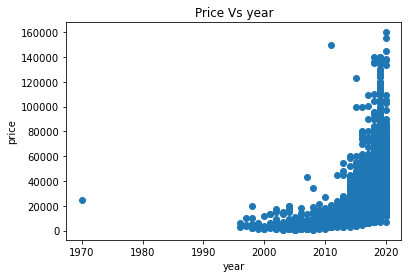

In [22]:
plt.scatter(data['year'],data['price'])
plt.xlabel('year')
plt.ylabel('price')
plt.title('Price Vs year')

Text(0.5, 1.0, 'Price Vs mpg')

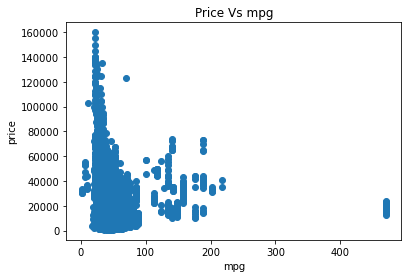

In [23]:
plt.scatter(data['mpg'],data['price'])
plt.xlabel('mpg')
plt.ylabel('price')
plt.title('Price Vs mpg')

## identify outliers

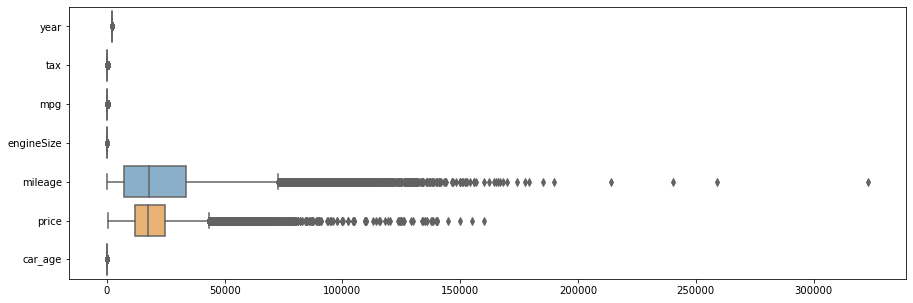

In [24]:
mpl.rcParams['figure.figsize'] = (15,5)
sns.boxplot(data=data, palette="Set3", orient='h')

### Mileage and Price has high variability possibly because of Outliers

In [25]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

year              3.0
tax              20.0
mpg              17.1
engineSize        0.6
mileage       26246.0
price         12550.0
car_age           3.0
dtype: float64


 ### outlier detection

In [26]:
print ("When we have not removed any outliers from the dataset, we have " + str(len(data)) + " entries") 

data_o = data[~((data< (Q1 - 1.5 * IQR)) |(data> (Q3 + 1.5 * IQR))).any(axis=1)]

print ("When we have removed all outliers from the dataset, we have " + str(len(data_o)) + " entries")
print ("The proportion of outliers which exist when compared to the dataframe are: " + str(len(data_o)/len(data)))

When we have not removed any outliers from the dataset, we have 52533 entries
When we have removed all outliers from the dataset, we have 32714 entries
The proportion of outliers which exist when compared to the dataframe are: 0.6227323777435136


## Comparing box plot with and without outliers

Text(0.5, 1.0, 'outliers removed')

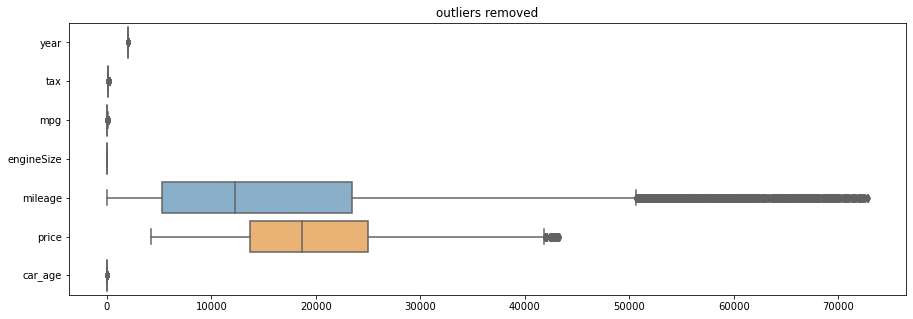

In [27]:
mpl.rcParams['figure.figsize'] = (15,5)
sns.boxplot(data=data_o, palette="Set3", orient='h')
plt.title("outliers removed")

Text(0.5, 1.0, 'Data with outliers')

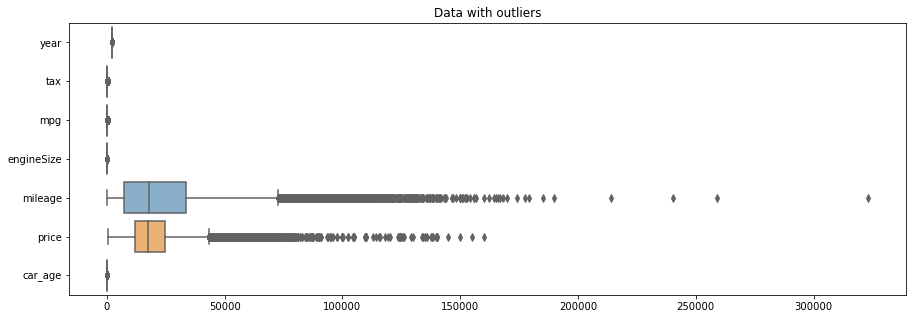

In [28]:
mpl.rcParams['figure.figsize'] = (15,5)
sns.boxplot(data=data, palette="Set3", orient='h')
plt.title("Data with outliers")

In [29]:
#without Outliers
data_o.shape

(32714, 11)

In [30]:
#With Outliers
data.shape

(52533, 11)

## Based on the boxplots, we have come to the conclusion that, we shouldn't remove the outliers, as we are trying to understand the price behavior based on other factors.

## Correlation Matrix using heatmap

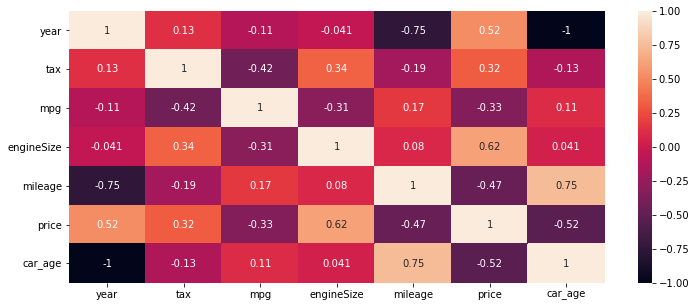

In [31]:
plt.figure(figsize=(12,5))
sns.heatmap(data.corr(), annot= True)

### With respect to price the engine Size has a correlation by .62 that indicates as the size of engine increase the price also have affect. With the increase in price tax also correlated by .32 followed by year .52. The highest correlation score is .75 between car age and Mileage . 


## Converting categorical columns: Model, transmission and FuelType to Numerical values by using One Hot Coding

In [32]:
data1 =pd.get_dummies(data, columns= ['transmission', 'fuelType','model','Manufacture'])

In [33]:
data1

,year,tax,mpg,engineSize,mileage,price,car_age,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,...,model_ i3,model_ i8,model_180,model_CLA200,model_E220,model_E230,Manufacture_Audi,Manufacture_BMW,Manufacture_Ford,Manufacture_Mercedes
0,2005,325,32.1,1.8,63000,5200,15,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2017,20,61.4,2.1,27000,34948,3,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2016,555,28.0,5.5,6200,49948,4,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2016,325,30.4,4.0,16000,61948,4,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2016,325,30.1,4.0,4000,73948,4,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52528,2016,125,54.3,1.2,31348,7999,4,0,1,0,...,0,0,0,0,0,0,0,0,1,0
52529,2017,150,47.1,1.4,16700,8999,3,0,1,0,...,0,0,0,0,0,0,0,0,1,0
52530,2014,30,57.7,1.0,40700,7499,6,0,1,0,...,0,0,0,0,0,0,0,0,1,0
52531,2015,20,67.3,1.6,7010,9999,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0


## Identify multicollinearity

In [34]:
# the independent variables set 
X = data1[['price']] 
X= data1.drop(['price'],axis=1)
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
pd.set_option('display.max_rows', vif_data.shape[0]+1)
print(vif_data)

C:\Users\owner\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                          feature           VIF
0                            year           inf
1                             tax  1.657913e+00
2                             mpg  6.258544e+00
3                      engineSize  3.658497e+00
4                         mileage  2.616799e+00
5                         car_age  9.007199e+15
6          transmission_Automatic           inf
7             transmission_Manual           inf
8          transmission_Semi-Auto           inf
9                 fuelType_Diesel           inf
10              fuelType_Electric           inf
11                fuelType_Hybrid           inf
12                fuelType_Petrol           inf
13                model_ 1 Series           inf
14                model_ 2 Series           inf
15                model_ 3 Series           inf
16                model_ 4 Series           inf
17                model_ 5 Series           inf
18                model_ 6 Series           inf
19                model_ 7 Series       

## we can se car_age has higher multicollinearity

## to avoid multi-collinearity we are dropping some columns from X 

In [35]:
X = data1['price']
X= data1.drop(['price','car_age'],axis=1)
Y= data1['price']
OLSmodel = sm.OLS(Y,X)
OLSmodelResult = OLSmodel.fit()
OLSmodelResult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     2810.
Date:                Tue, 01 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:19:20   Log-Likelihood:            -5.1402e+05
No. Observations:               52533   AIC:                         1.028e+06
Df Residuals:                   52423   BIC:                         1.029e+06
Df Model:                         109                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
year                          1726.7707     13.946    123.816      0.000    1699.436    1754.105
tax                            -16.0927      0.376    -42.803      0.000     -16.830     -15.356
mpg                           -136.9829      2.565    -53.411      0.000    -142.010    -131.956
engineSize                    6328.7661     56.779    111.464      0.000    6217.479    6440.053
mileage                         -0.1006      0.001    -73.017      0.000      -0.103      -0.098
transmission_Automatic       -1.365e+06   1.11e+04   -122.667      0.000   -1.39e+06   -1.34e+06
transmission_Manual          -1.366e+06   1.11e+04   -122.768      0.000   -1.39e+06   -1.34e+06
transmission_Semi-Auto       -1.365e+06   1.11e+04   -122.591      0.000   -1.39e+06   -1.34e+06
fuelType_Diesel              -1.026e+06   8361.802   -122.755      0.000   -1.04e+06   -1.01e+06
fuelType_Electric            -1.028e+06   8581.351   -119.813      0.000   -1.04e+06   -1.01e+06
fuelType_Hybrid              -1.016e+06   8368.144   -121.384      0.000   -1.03e+06   -9.99e+05
fuelType_Petrol              -1.026e+06   8359.459   -122.676      0.000   -1.04e+06   -1.01e+06
model_ 1 Series              -5.651e+04    406.585   -138.985      0.000   -5.73e+04   -5.57e+04
model_ 2 Series              -5.649e+04    416.643   -135.577      0.000   -5.73e+04   -5.57e+04
model_ 3 Series              -5.437e+04    407.682   -133.363      0.000   -5.52e+04   -5.36e+04
model_ 4 Series              -5.452e+04    420.826   -129.557      0.000   -5.53e+04   -5.37e+04
model_ 5 Series              -5.248e+04    419.526   -125.084      0.000   -5.33e+04   -5.17e+04
model_ 6 Series              -5.394e+04    559.655    -96.373      0.000    -5.5e+04   -5.28e+04
model_ 7 Series              -4.607e+04    568.142    -81.082      0.000   -4.72e+04    -4.5e+04
model_ 8 Series               -2.76e+04    780.945    -35.340      0.000   -2.91e+04   -2.61e+04
model_ A Class               -4.378e+04    486.820    -89.924      0.000   -4.47e+04   -4.28e+04
model_ A1                    -5.064e+04    446.156   -113.505      0.000   -5.15e+04   -4.98e+04
model_ A2                    -3.025e+04   4154.175     -7.282      0.000   -3.84e+04   -2.21e+04
model_ A3                    -4.896e+04    443.432   -110.411      0.000   -4.98e+04   -4.81e+04
model_ A4                    -4.885e+04    450.130   -108.526      0.000   -4.97e+04    -4.8e+04
model_ A5                     -4.74e+04    455.931   -103.958      0.000   -4.83e+04   -4.65e+04
model_ A6                    -4.658e+04    461.755   -100.874      0.000   -4.75e+04   -4.57e+04
model_ A7                    -4.647e+04    573.283    -81.056      0.000   -4.76e+04   -4.53e+04
model_ A8                     -4.31e+04    576.496    -74.767      0.000   -

### Our R square is .85 which seems a good fit where all P-value falls under 0.05 

### To predict the price we are using Train Test and split where our size is 70:30

In [36]:
x = data1.drop('price', axis=1)
y = data1['price']

In [37]:
X_train, X_test, y_train, y_test, = train_test_split(X,y,test_size= 0.3)

In [38]:
X_train.shape

(36773, 116)

In [39]:
X_test.shape

(15760, 116)

In [40]:
X_train

,year,tax,mpg,engineSize,mileage,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,...,model_ i3,model_ i8,model_180,model_CLA200,model_E220,model_E230,Manufacture_Audi,Manufacture_BMW,Manufacture_Ford,Manufacture_Mercedes
17517,2019,150,38.2,2.0,12413,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
6655,2018,145,68.9,1.5,2300,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
47201,2018,150,65.7,1.0,7256,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
45990,2017,125,51.4,1.0,14482,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
51674,2015,0,65.7,1.0,14100,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32497,2016,20,68.9,0.0,24528,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
49345,2017,125,57.7,2.0,26476,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
22069,2015,0,80.7,1.6,44821,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
10034,2012,200,42.2,1.8,59512,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
lr=LinearRegression()

In [42]:
lr.fit(X_train, y_train)

LinearRegression()

In [43]:
lr.predict(X_test)

array([20615.61112164, 43533.20558458, 17762.68269197, ...,
       19813.05984705, 24123.83203646, 11609.62998422])

In [44]:
print(lr.score(X_test, y_test))

0.8608012273728255


### After  Training and  testing our data  we recieved a Accuracy Score of 86% 

## Cross Validation 

In [45]:
cvsr = cross_val_score(LinearRegression(), X,y,cv=5)
cvsr

array([0.64548268, 0.82474994, 0.82929836, 0.77090031, 0.56292331])

In [46]:
np.mean(cvsr)

0.7266709188359354

### We use cross validation To estimate the accuracy of our model on unseen data where we are training the model from 5 folds 

